## Tensor

A tensor is a multidimensional array optimized to work with GPU (i.e., it is much more efficient than NumPy arrays). We can use it to represent image sets, multi-channel images, kernels weights, etc. -- e.g., let's create a tensor from an image.

In [1]:
#import package to manipulate and display images
from skimage import io
import matplotlib.pyplot as plt

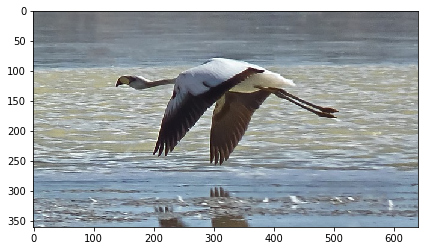

In [2]:
#load image and display it
input_image = io.imread("./images/bird.png")
display     = io.imshow(input_image)
plt.show()

Our image is already a multidimensional NumPy array.

In [3]:
#image size: number of rows (y dim., height), number of ncolumns (x dim., width), number of channels (depth)
print(input_image.shape, type(input_image))

(360, 640, 3) <class 'numpy.ndarray'>


It can be easily transformed into a pytorch tensor.

In [5]:
import torch

tmp_image = torch.tensor(input_image)
print(tmp_image.shape, type(tmp_image))

ModuleNotFoundError: No module named 'torch'

In [5]:
print(tmp_image)

tensor([[[110, 115, 119],
         [110, 115, 119],
         [111, 116, 120],
         ...,
         [115, 118, 125],
         [114, 117, 124],
         [116, 119, 126]],

        [[109, 114, 118],
         [109, 114, 118],
         [109, 114, 118],
         ...,
         [111, 114, 121],
         [113, 116, 123],
         [115, 118, 125]],

        [[111, 116, 120],
         [111, 116, 120],
         [112, 117, 121],
         ...,
         [108, 111, 118],
         [110, 113, 120],
         [111, 114, 121]],

        ...,

        [[133, 149, 162],
         [127, 143, 156],
         [138, 152, 165],
         ...,
         [145, 172, 191],
         [148, 175, 194],
         [139, 166, 185]],

        [[119, 133, 146],
         [124, 138, 151],
         [114, 126, 140],
         ...,
         [145, 172, 191],
         [152, 179, 198],
         [142, 169, 188]],

        [[149, 163, 176],
         [150, 164, 177],
         [149, 161, 175],
         ...,
         [143, 170, 189],
        

However, to use it in pytorch, you must place the number of channels before the numbers of rows and columns. 

In [6]:
image = tmp_image.permute(2,0,1) # same as tmp_image.transpose(1, 2).transpose(0, 1) 
print(image.shape)

torch.Size([3, 360, 640])


We can also represent a kernel $K = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$ as a pytorch tensor.

In [7]:
Sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).float()
print(Sobel_x.shape)
print(Sobel_x)

torch.Size([3, 3])
tensor([[-1.,  0.,  1.],
        [-2.,  0.,  2.],
        [-1.,  0.,  1.]])


Tensors can also be initialized as we do with NumPy arrays. They have many operations in common.

In [7]:
x = torch.zeros((3,3))
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [8]:
x = torch.ones((3,3))
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [10]:
x = torch.randn((3,3)) # random numbers with normal distribution with mean 0 and stdev 1
y = torch.rand((3,3))  # random numbers with uniform distribution in [0,1]
print(x)
print(y)

tensor([[ 0.9385,  0.9797, -0.0472],
        [ 0.2084,  0.7100, -0.0281],
        [-2.0445,  0.2596, -0.9190]])
tensor([[0.0574, 0.6783, 0.9577],
        [0.8545, 0.5504, 0.4936],
        [0.5546, 0.1467, 0.4889]])


In [11]:
y = torch.randint(low=100, high=200, size=(5,4)) # random integer numbers in [100,199]
print(y)

tensor([[109, 106, 105, 105],
        [103, 176, 140, 190],
        [157, 110, 157, 151],
        [170, 185, 159, 142],
        [152, 139, 172, 120]])


Some examples of operations with tensors

In [12]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)
y = x * 10
print(y)
z = x + 10 # x.add(10)
print(z)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[10, 20, 30],
        [40, 50, 60]])
tensor([[11, 12, 13],
        [14, 15, 16]])


In [13]:
# reshaping
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)
print(x.shape)
x = x.reshape((3,2)) # Note that, this is NOT the same as x.transpose(0,1)
print(x.shape)
print(x)
x = x.reshape(-1)
print(x.shape)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([6])
tensor([1, 2, 3, 4, 5, 6])


In [15]:
# squeezing and unsqueezing

x = torch.randn((4,4))
print("A tensor of size {} x {}".format(x.shape[0],x.shape[1]))
print(x)

y = x.unsqueeze(0) # It adds a new axis 0 of size one. It could also be axis 1 or 2. 
print("By adding axis=0, we have a tensor of size {} x {} x {}".format(y.shape[0],y.shape[1],y.shape[2]))
print(y)

x = y.squeeze(0) # It removes axis 0 if its size is one
print("By removing axis=0, we have a tensor of size {} x {}".format(x.shape[0],x.shape[1]))
print(x)

x = torch.randn((4,1,4,1,1))
print("A tensor with size {} x {} x {} x {} x {}".format(x.shape[0],x.shape[1],x.shape[2],x.shape[3],x.shape[4]))
print(x)

y = x.squeeze(3) # It removes axis 3 if its size is one
print("By removing axis=3, we have a tensor of size {} x {} x {} x {}".format(y.shape[0],y.shape[1],y.shape[2],y.shape[3]))
print(y)

y = x.squeeze() # It removes all axes of size one
print("By removing all axes of size one, we have a tensor of size {} x {}".format(y.shape[0],y.shape[1]))
print(y)


A tensor with size 4 x 1 x 4 x 1 x 1
tensor([[[[[ 0.9766]],

          [[-1.8417]],

          [[-1.3303]],

          [[ 0.2143]]]],



        [[[[ 1.4694]],

          [[ 0.9160]],

          [[ 0.0712]],

          [[ 0.4132]]]],



        [[[[ 1.2524]],

          [[ 1.5944]],

          [[ 0.4320]],

          [[ 1.1317]]]],



        [[[[ 0.6718]],

          [[ 0.1761]],

          [[ 0.1889]],

          [[-0.2402]]]]])
By removing axis=3, we have a tensor of size 4 x 1 x 4 x 1
tensor([[[[ 0.9766],
          [-1.8417],
          [-1.3303],
          [ 0.2143]]],


        [[[ 1.4694],
          [ 0.9160],
          [ 0.0712],
          [ 0.4132]]],


        [[[ 1.2524],
          [ 1.5944],
          [ 0.4320],
          [ 1.1317]]],


        [[[ 0.6718],
          [ 0.1761],
          [ 0.1889],
          [-0.2402]]]])
By removing all axes of size one, we have a tensor of size 4 x 4
tensor([[ 0.9766, -1.8417, -1.3303,  0.2143],
        [ 1.4694,  0.9160,  0.0712,  0.4132]

Inner product, matrix multiplication, and concatenation

In [17]:
x = torch.tensor([1, 1, 0])
y = torch.tensor([1, 0, 1])
print("Inner product:")
print("<{},{}>={}".format(x,y,x.dot(y)))
print()

print("Matrix multiplication:")
x = torch.tensor([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
y = torch.tensor([1, 1, 1])
print(x, "x", y,"=",y.matmul(x)) # The same as y@x
print()

print("Concatenation:")
x = torch.arange(9)
print("x = ",x)
y = x.reshape((3,3))
print("y = ", y, "after reshaping x as a 3 x 3 matrix")
z = torch.cat([y,y], axis=0)
print("z = ", z, "after concatenating y with y along axis 0")
z = torch.cat([y,y], axis=1)
print("z = ", z, "after concatenating y with y along axis 1")

Inner product:
<tensor([1, 1, 0]),tensor([1, 0, 1])>=1

Matrix multiplication:
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]) x tensor([1, 1, 1]) = tensor([3, 6, 9])

Concatenation:
x =  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
y =  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) after reshaping x as a 3 x 3 matrix
z =  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) after concatenating y with y along axis 0
z =  tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5],
        [6, 7, 8, 6, 7, 8]]) after concatenating y with y along axis 1


A very important feature is that tensors come with a built-in functionality to calculate gradients

In [22]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
print("x = ", x)

x =  tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


Suppose we calculate $ y = \sum_{i=1}^{4} x^2_i $ whose derivative $\frac{\partial y}{\partial x} = 2 \sum_{i=1}^{4} x_i$. The gradient can be calculated by calling y.backward() followed by x.grad.

In [23]:
y = x.pow(2).sum()
print("y = x.pow(2).sum() =", y)
y.backward()
print("x.grad = ", x.grad)
print("z = x.grad.sum() = ", x.grad.sum())

y = x.pow(2).sum() = tensor(7., grad_fn=<SumBackward0>)
x.grad =  tensor([[ 4., -2.],
        [ 2.,  2.]])
z = x.grad.sum() =  tensor(6.)
